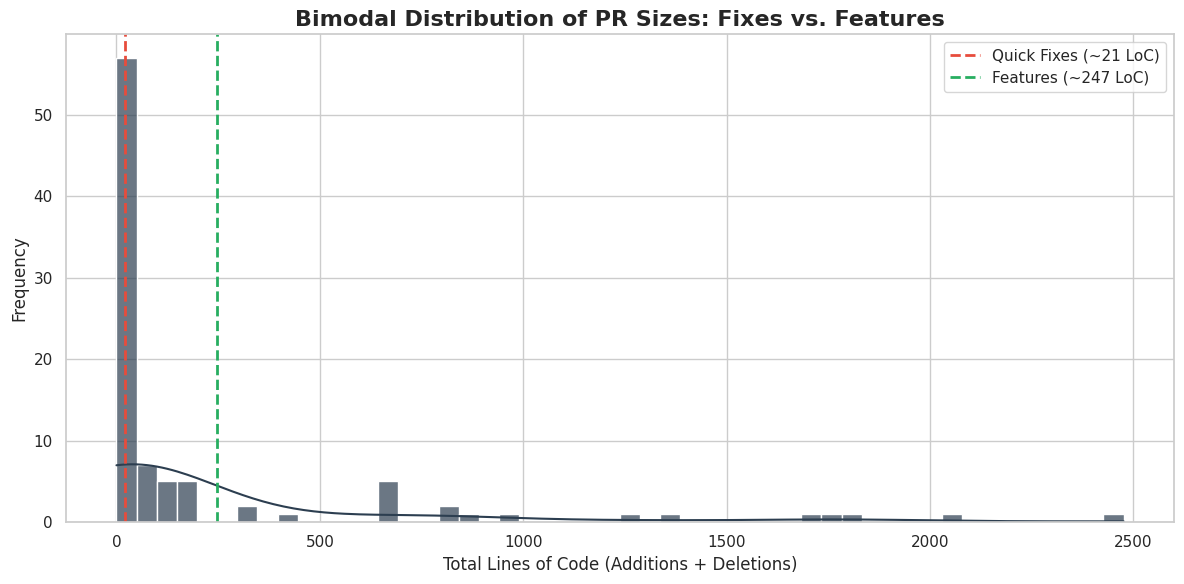

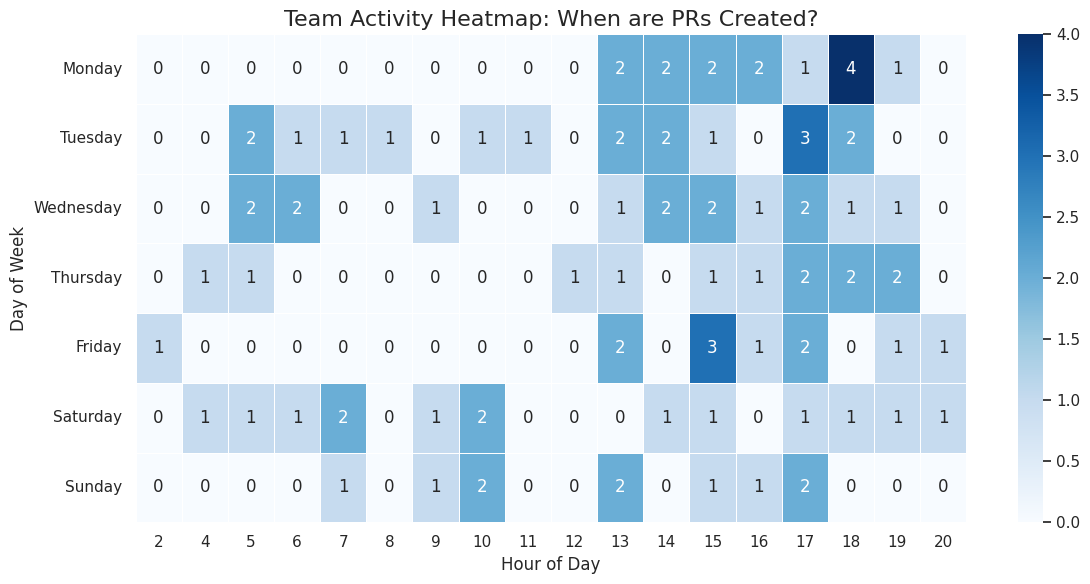

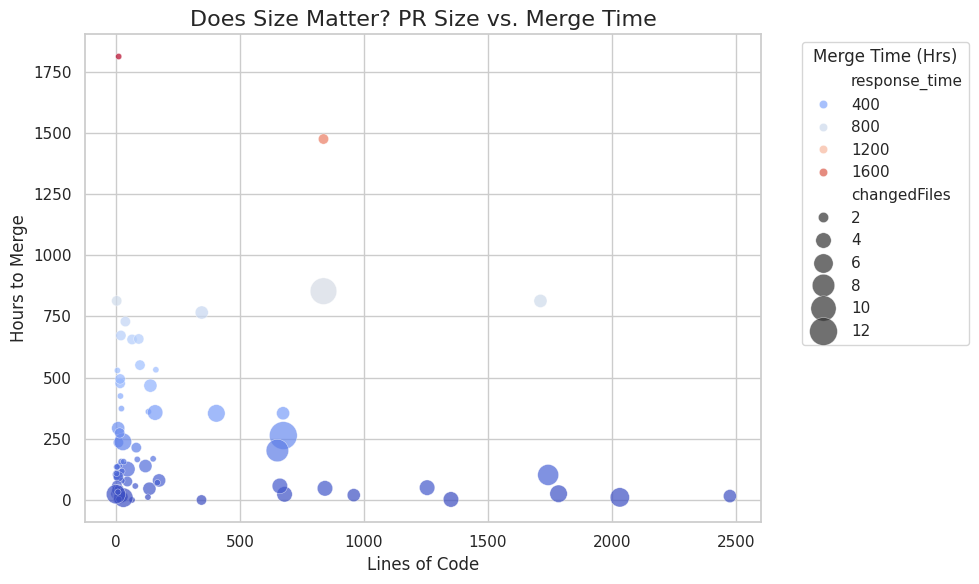

/tmp/ipykernel_8578/811835660.py:76: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['createdAt'].dt.to_period('M').astype(str)


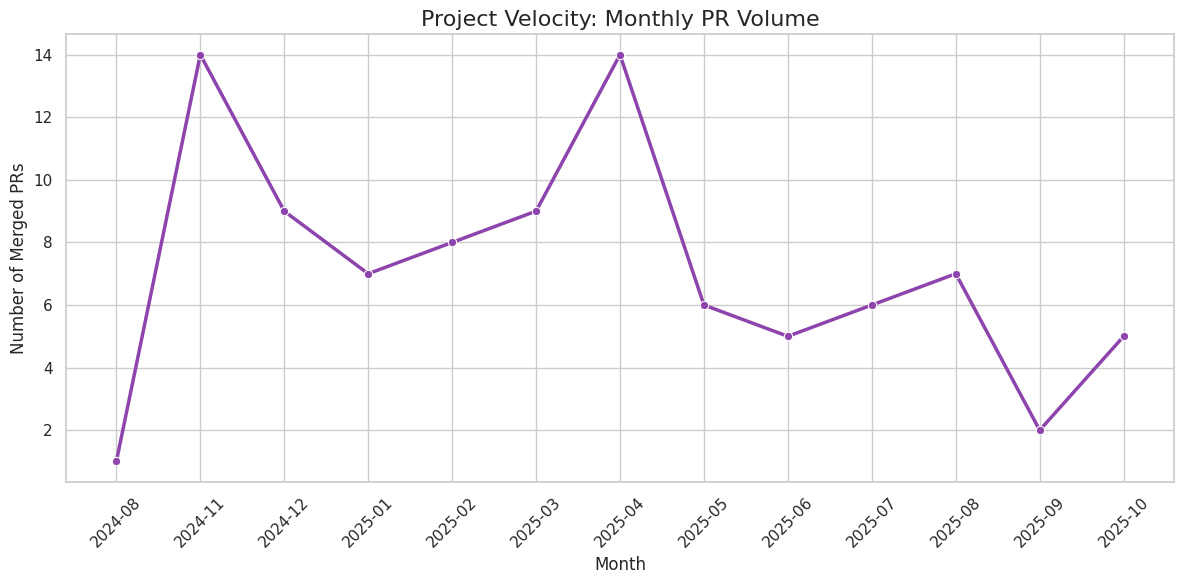

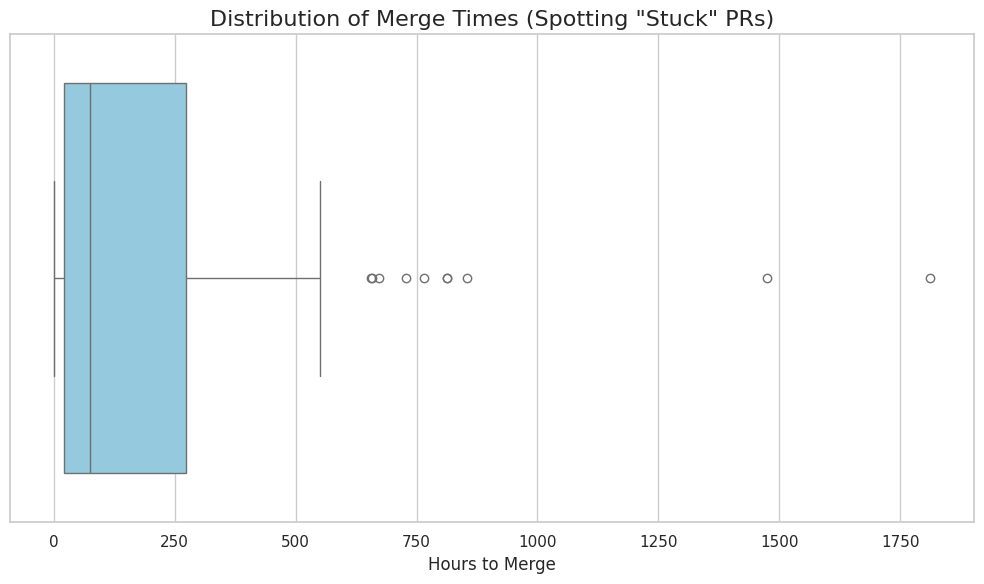

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data (Your File Path)
file_path = "/workspaces/ParagEkbote.github.io/scripts/merged_prs.json"
df = pd.read_json(file_path)

# 2. Data Preprocessing (Your Logic)
df["createdAt"] = pd.to_datetime(df["createdAt"])
df["mergedAt"] = pd.to_datetime(df["mergedAt"])
df["loc"] = df["additions"].fillna(0) + df["deletions"].fillna(0)
df["response_time"] = (df["mergedAt"] - df["createdAt"]).dt.total_seconds() / 3600

# Set a professional style
sns.set_theme(style="whitegrid")

# --- Visualization 1: Bimodal Distribution (The 21 vs 247 Insight) ---
plt.figure(figsize=(12, 6))
# Using a log scale can sometimes help if the "247" peak is far out, 
# but for distinct clusters, a standard scale works well.
sns.histplot(data=df, x='loc', bins=50, kde=True, color='#2c3e50', alpha=0.7)

# Add vertical lines for the insights
plt.axvline(21, color='#e74c3c', linestyle='--', linewidth=2, label='Quick Fixes (~21 LoC)')
plt.axvline(247, color='#27ae60', linestyle='--', linewidth=2, label='Features (~247 LoC)')

plt.title('Bimodal Distribution of PR Sizes: Fixes vs. Features', fontsize=16, weight='bold')
plt.xlabel('Total Lines of Code (Additions + Deletions)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('1_bimodal_loc_distribution.png')
plt.show()

# --- Visualization 2: Review Velocity Heatmap ---
# Extract time components
df['day_name'] = df['createdAt'].dt.day_name()
df['hour'] = df['createdAt'].dt.hour
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Prepare matrix for heatmap
heatmap_data = df.groupby(['day_name', 'hour']).size().unstack(fill_value=0)
heatmap_data = heatmap_data.reindex(days_order)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d', linewidths=.5)
plt.title('Team Activity Heatmap: When are PRs Created?', fontsize=16)
plt.ylabel('Day of Week')
plt.xlabel('Hour of Day')
plt.tight_layout()
plt.savefig('2_activity_heatmap.png')
plt.show()

# --- Visualization 3: Scatter Plot (Time vs Size) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='loc', 
    y='response_time', 
    size='changedFiles', 
    sizes=(20, 400), 
    hue='response_time', 
    palette='coolwarm', 
    alpha=0.7
)
plt.title('Does Size Matter? PR Size vs. Merge Time', fontsize=16)
plt.xlabel('Lines of Code')
plt.ylabel('Hours to Merge')
plt.legend(title='Merge Time (Hrs)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('3_scatter_time_vs_size.png')
plt.show()

# --- Visualization 4: Monthly Activity Trend ---
df['month_year'] = df['createdAt'].dt.to_period('M').astype(str)
monthly_counts = df['month_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o', linewidth=2.5, color='#8e44ad')
plt.title('Project Velocity: Monthly PR Volume', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Merged PRs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('4_monthly_trend.png')
plt.show()

# --- Visualization 5: Outlier Analysis (Box Plot) ---
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['response_time'], color='skyblue')
plt.title('Distribution of Merge Times (Spotting "Stuck" PRs)', fontsize=16)
plt.xlabel('Hours to Merge')
plt.tight_layout()
plt.savefig('5_response_time_boxplot.png')
plt.show()

2025-11-18 14:34:25,178 - INFO - ============================================================


2025-11-18 14:34:25,180 - INFO - GITHUB PR OPTIMIZATION ANALYSIS
2025-11-18 14:34:25,182 - INFO - ============================================================
2025-11-18 14:34:25,184 - INFO - Loading data from /workspaces/ParagEkbote.github.io/scripts/merged_prs.json
2025-11-18 14:34:25,199 - INFO - Flattening nested column: repository
2025-11-18 14:34:25,202 - INFO - Flattening nested column: author
2025-11-18 14:34:25,205 - INFO - Successfully loaded 93 PR records
2025-11-18 14:34:25,205 - INFO - Columns: ['url', 'title', 'createdAt', 'mergedAt', 'additions', 'deletions', 'changedFiles', 'repository_nameWithOwner', 'repository_stargazerCount', 'repository_primaryLanguage', 'repository_description', 'author_login']
2025-11-18 14:34:25,206 - INFO - Preprocessing data...
2025-11-18 14:34:25,214 - WARNING - Removing problematic columns for plotting: ['repository_primaryLanguage']
2025-11-18 14:34:25,216 - INFO - Preprocessing complete. 93 records ready for analysis.
2025-11-18 14:34:25,2

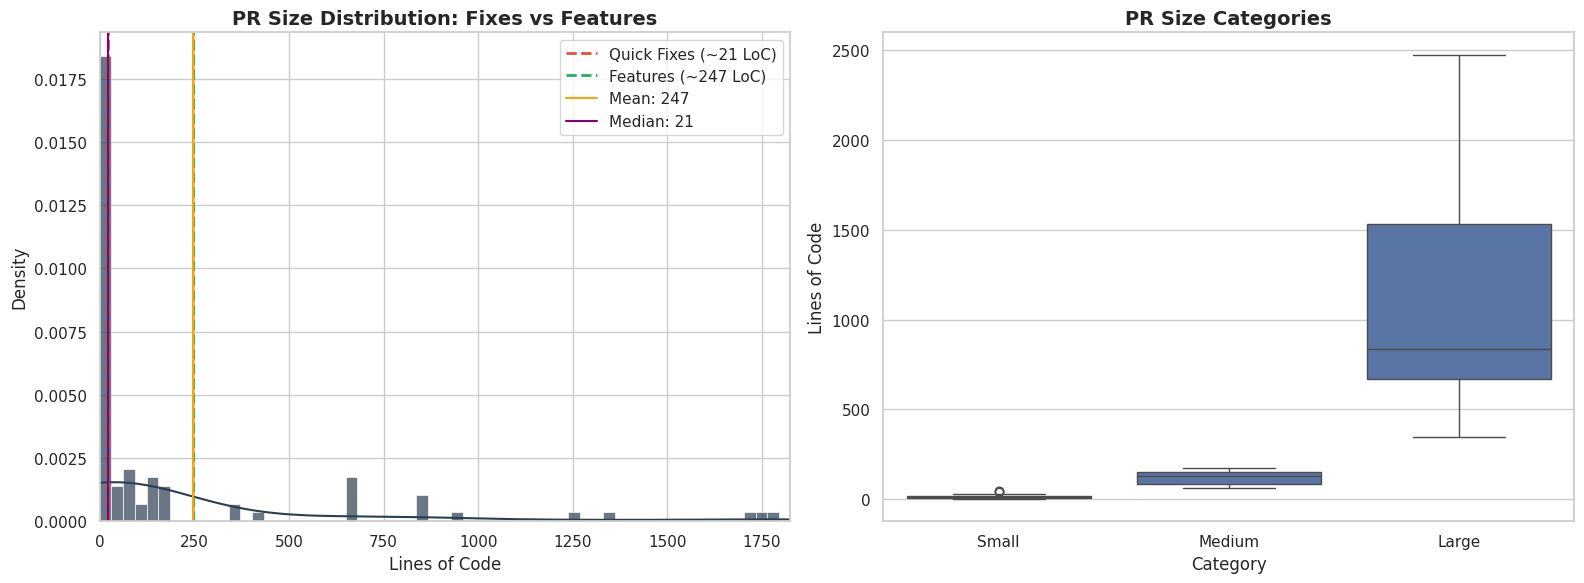

2025-11-18 14:34:26,273 - INFO - Plotting activity patterns...


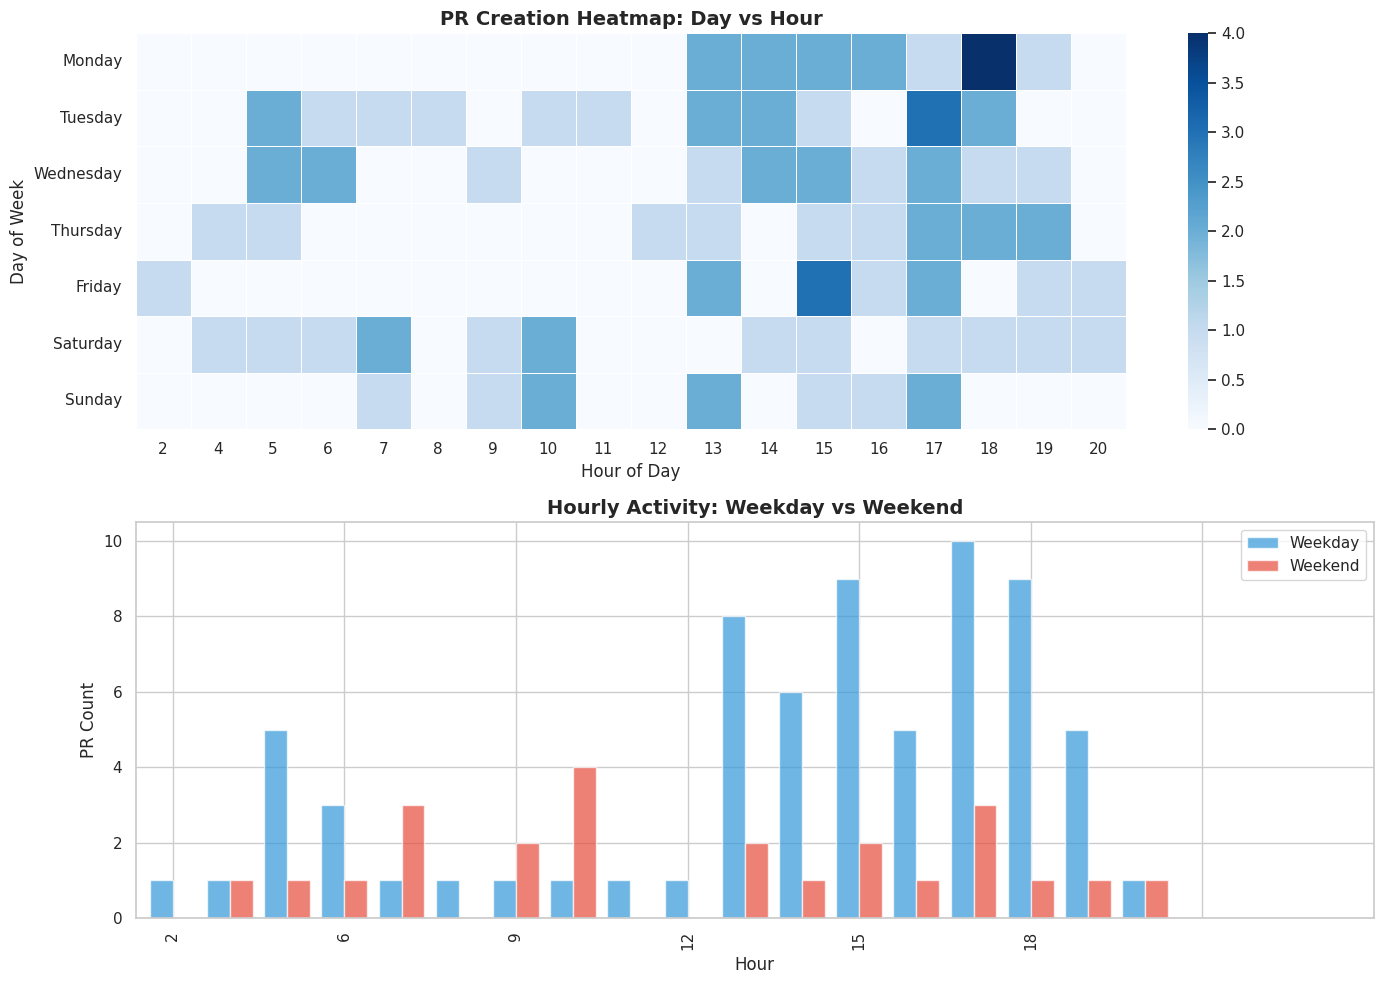

2025-11-18 14:34:28,017 - INFO - Plotting size-time relationship...


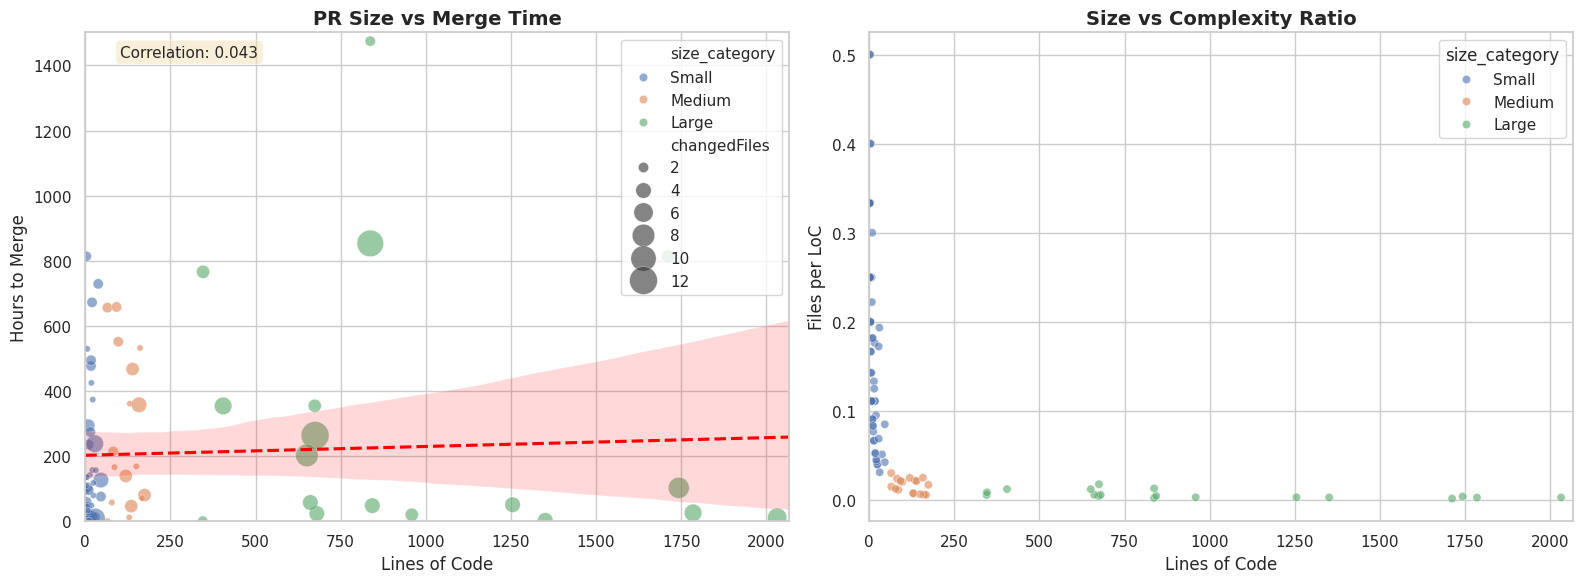

2025-11-18 14:34:29,262 - INFO - Plotting temporal trends...


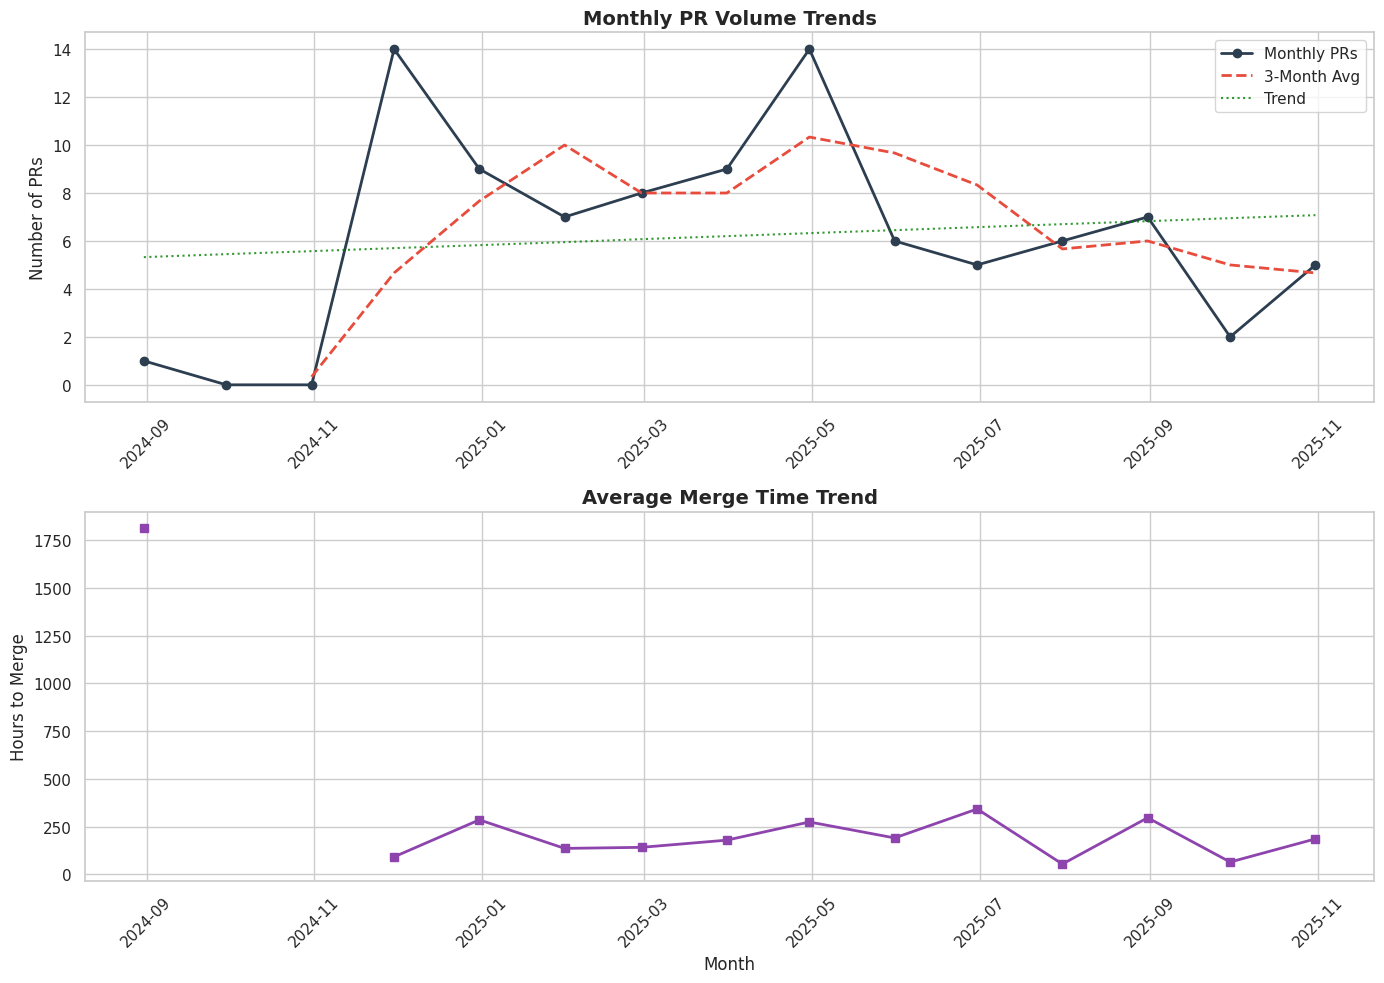

2025-11-18 14:34:30,638 - INFO - Plotting outlier analysis...


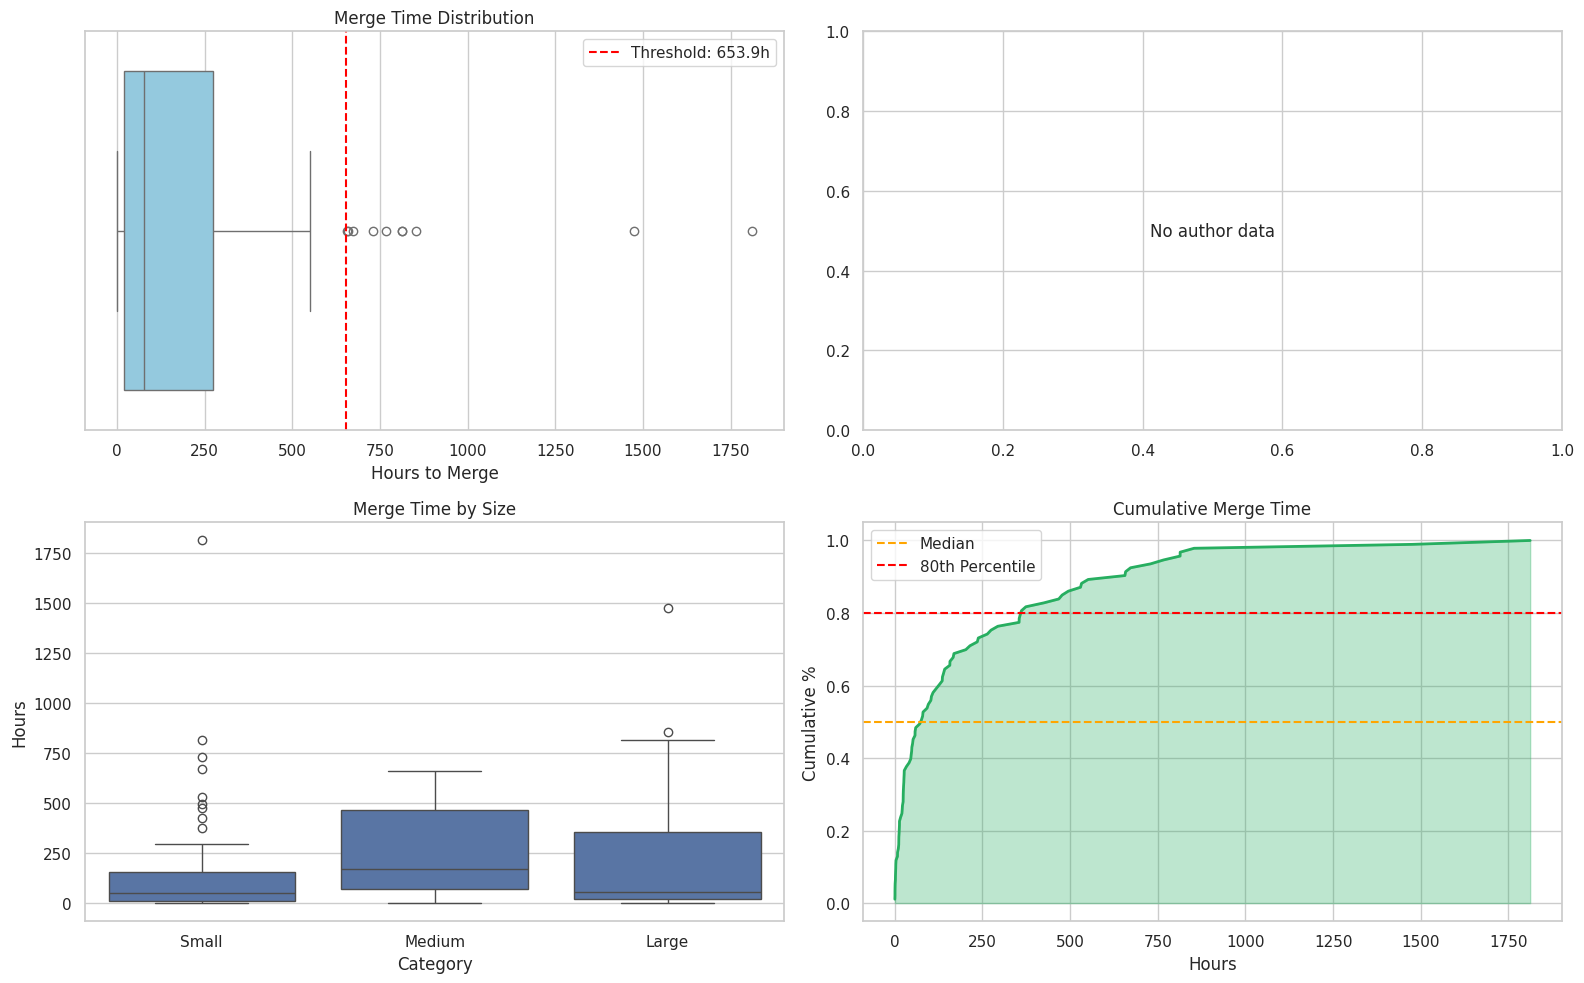

2025-11-18 14:34:32,276 - INFO - Plotting contributor efficiency...
2025-11-18 14:34:32,277 - WARNING - Author column missing - skipping contributor analysis
2025-11-18 14:34:32,282 - INFO - Processed data saved to: github_analysis_final/processed_pr_data.csv
2025-11-18 14:34:32,282 - INFO - Analysis complete!



EXECUTIVE SUMMARY
📊 Total PRs Analyzed: 93
⏱️  Avg Merge Time: 209.4 hours
📈 Median Merge Time: 75.8 hours
📏 Avg PR Size: 247 lines
🔗 Size-Time Correlation: 0.043
🎯 Bimodal Peaks Detected: 0
🎉 Weekend Activity: 25.8%

📁 All outputs saved to: github_analysis_final/


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.signal import find_peaks
from typing import Dict, Any, Optional, Tuple, List
import logging
from pathlib import Path
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("github_analysis.log"),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)


def flatten_nested_dict(df: pd.DataFrame, max_depth: int = 1) -> pd.DataFrame:
    """
    Flatten nested dictionary columns in a DataFrame.
    E.g., {'login': 'user'} becomes 'author_login' column.
    """
    df = df.copy()
    dict_cols = []
    
    # Identify columns containing dictionaries
    for col in df.columns:
        if df[col].dtype == object:
            # Check if any value is a dict
            sample = df[col].dropna().iloc[0] if not df[col].dropna().empty else None
            if isinstance(sample, dict):
                dict_cols.append(col)
    
    # Flatten each dict column
    for col in dict_cols:
        logger.info(f"Flattening nested column: {col}")
        # Get all unique keys from the dictionaries
        all_keys = set()
        for val in df[col].dropna():
            if isinstance(val, dict):
                all_keys.update(val.keys())
        
        # Create new columns for each key
        for key in all_keys:
            new_col_name = f"{col}_{key}"
            df[new_col_name] = df[col].apply(
                lambda x: x.get(key) if isinstance(x, dict) else None
            )
        
        # Drop original column
        df.drop(columns=[col], inplace=True)
    
    return df


class GitHubPROptimizer:
    """
    Comprehensive analyzer for GitHub PR data providing statistical insights
    and visualizations to optimize development workflows.
    """
    
    def __init__(self, file_path: str, output_dir: str = "github_analysis_final"):
        self.file_path = Path(file_path)
        self.output_dir = Path(output_dir)
        self.output_dir.mkdir(exist_ok=True)
        self.df: Optional[pd.DataFrame] = None
        
        # Configuration
        self.config = {
            'small_pr_threshold': 50,
            'medium_pr_threshold': 250,
            'outlier_multiplier': 1.5,
            'dpi': 300,
            'figsize': (14, 8),
            'style': 'whitegrid',
            'palette': 'deep',
            'max_plot_points': 5000  # Limit for performance
        }
        
        # Set plotting style
        sns.set_theme(style=self.config['style'], palette=self.config['palette'])
        
    def load_and_validate(self) -> bool:
        """
        Load JSON data and validate structure.
        Handles nested dictionaries by flattening them.
        """
        try:
            logger.info(f"Loading data from {self.file_path}")
            self.df = pd.read_json(self.file_path)
            
            # Flatten nested dictionaries (e.g., author, milestone)
            self.df = flatten_nested_dict(self.df)
            
            required_cols = ['createdAt', 'mergedAt', 'additions', 'deletions']
            missing = [col for col in required_cols if col not in self.df.columns]
            
            if missing:
                logger.error(f"Missing required columns: {missing}")
                logger.info(f"Available columns: {list(self.df.columns)}")
                return False
            
            logger.info(f"Successfully loaded {len(self.df)} PR records")
            logger.info(f"Columns: {list(self.df.columns)}")
            return True
            
        except Exception as e:
            logger.error(f"Data loading failed: {e}", exc_info=True)
            return False
    
    def preprocess(self):
        """Clean data and calculate derived metrics."""
        logger.info("Preprocessing data...")
        
        # Convert dates
        self.df['createdAt'] = pd.to_datetime(self.df['createdAt'], errors='coerce')
        self.df['mergedAt'] = pd.to_datetime(self.df['mergedAt'], errors='coerce')
        
        # Remove invalid records
        invalid = self.df['createdAt'].isna() | self.df['mergedAt'].isna()
        if invalid.any():
            logger.warning(f"Dropping {invalid.sum()} records with invalid dates")
            self.df = self.df[~invalid]
        
        # Core metrics
        self.df['loc'] = self.df['additions'].fillna(0) + self.df['deletions'].fillna(0)
        self.df['response_time'] = (self.df['mergedAt'] - self.df['createdAt']).dt.total_seconds() / 3600
        
        # Remove negative response times
        negative_time = self.df['response_time'] < 0
        if negative_time.any():
            logger.warning(f"Dropping {negative_time.sum()} records with negative merge times")
            self.df = self.df[~negative_time]
        
        # Derived metrics
        self.df['review_efficiency'] = self.df['loc'] / (self.df['response_time'] + 0.1)
        self.df['complexity_ratio'] = self.df['changedFiles'] / (self.df['loc'] + 1)
        
        # Time components (use datetime for calculations, string for labels)
        self.df['day_name'] = self.df['createdAt'].dt.day_name()
        self.df['hour'] = self.df['createdAt'].dt.hour
        self.df['is_weekend'] = self.df['day_name'].isin(['Saturday', 'Sunday'])
        self.df['year_month'] = self.df['createdAt'].dt.strftime('%Y-%m')
        
        # Categorization
        self._categorize_sizes()
        
        # Remove any remaining dict/object columns that might cause issues
        self._sanitize_columns_for_plotting()
        
        logger.info(f"Preprocessing complete. {len(self.df)} records ready for analysis.")
    
    def _categorize_sizes(self):
        """Categorize PRs by size."""
        bins = [0, self.config['small_pr_threshold'], 
                self.config['medium_pr_threshold'], np.inf]
        labels = ['Small', 'Medium', 'Large']
        self.df['size_category'] = pd.cut(self.df['loc'], bins=bins, labels=labels)
    
    def _sanitize_columns_for_plotting(self):
        """
        Remove or convert any columns that might contain unhashable types
        that could break plotting functions.
        """
        # Check for problematic columns
        problematic_cols = []
        for col in self.df.columns:
            if self.df[col].dtype == object:
                # Check if any value is a dict or list
                sample_vals = self.df[col].dropna().head(10)
                for val in sample_vals:
                    if isinstance(val, (dict, list)):
                        problematic_cols.append(col)
                        break
        
        if problematic_cols:
            logger.warning(f"Removing problematic columns for plotting: {problematic_cols}")
            self.df.drop(columns=problematic_cols, inplace=True)
    
    def generate_summary(self) -> Dict[str, Any]:
        """Generate comprehensive statistics."""
        logger.info("Generating statistical summary...")
        
        summary = {
            'total_prs': len(self.df),
            'avg_response_time': self.df['response_time'].mean(),
            'median_response_time': self.df['response_time'].median(),
            'std_response_time': self.df['response_time'].std(),
            'avg_loc': self.df['loc'].mean(),
            'median_loc': self.df['loc'].median(),
            'correlation_size_time': self.df['loc'].corr(self.df['response_time']),
            'weekend_ratio': self.df['is_weekend'].mean()
        }
        
        # Detect bimodality
        hist, bin_edges = np.histogram(self.df['loc'], bins=50, density=True)
        peaks, _ = find_peaks(hist, height=0.01)
        summary['bimodal_peaks_detected'] = len(peaks)
        
        # Save to CSV
        pd.DataFrame([summary]).to_csv(self.output_dir / "summary_statistics.csv", index=False)
        
        logger.info(f"Summary: {summary}")
        return summary
    
    def plot_1_distribution_analysis(self):
        """PR size distribution with bimodal analysis."""
        logger.info("Plotting distribution analysis...")
        if self.df is None:
            logger.error("No data to plot")
            return
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Distribution plot
        sns.histplot(data=self.df, x='loc', bins=80, kde=True, ax=ax1, 
                    color='#2c3e50', alpha=0.7, stat='density')
        
        # Annotate key points
        mean_loc = self.df['loc'].mean()
        median_loc = self.df['loc'].median()
        
        ax1.axvline(21, color='#e74c3c', linestyle='--', linewidth=2, 
                   label='Quick Fixes (~21 LoC)')
        ax1.axvline(247, color='#27ae60', linestyle='--', linewidth=2, 
                   label='Features (~247 LoC)')
        ax1.axvline(mean_loc, color='orange', linestyle='-', 
                   label=f'Mean: {mean_loc:.0f}')
        ax1.axvline(median_loc, color='purple', linestyle='-', 
                   label=f'Median: {median_loc:.0f}')
        
        ax1.set_title('PR Size Distribution: Fixes vs Features', fontsize=14, weight='bold')
        ax1.set_xlabel('Lines of Code')
        ax1.set_ylabel('Density')
        ax1.legend()
        ax1.set_xlim(0, self.df['loc'].quantile(0.98))
        
        # Size categories
        sns.boxplot(data=self.df, x='size_category', y='loc', 
                   order=['Small', 'Medium', 'Large'], ax=ax2)
        ax2.set_title('PR Size Categories', fontsize=14, weight='bold')
        ax2.set_xlabel('Category')
        ax2.set_ylabel('Lines of Code')
        
        plt.tight_layout()
        plt.savefig(self.output_dir / '1_distribution_analysis.png', dpi=self.config['dpi'])
        plt.show()
        
        # Save category stats
        self.df.groupby('size_category').agg({
            'loc': ['count', 'mean', 'median'],
            'response_time': ['mean', 'median']
        }).to_csv(self.output_dir / '1_size_category_stats.csv')
    
    def plot_2_activity_patterns(self):
        """Heatmap of PR creation patterns."""
        logger.info("Plotting activity patterns...")
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
        
        # Daily/hourly heatmap
        days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        heatmap_data = self.df.groupby(['day_name', 'hour']).size().unstack(fill_value=0)
        heatmap_data = heatmap_data.reindex(days_order)
        
        sns.heatmap(heatmap_data, cmap='Blues', annot=False, fmt='d', 
                   linewidths=.5, ax=ax1)
        ax1.set_title('PR Creation Heatmap: Day vs Hour', fontsize=14, weight='bold')
        ax1.set_ylabel('Day of Week')
        ax1.set_xlabel('Hour of Day')
        
        # Weekend comparison
        hourly_activity = self.df.groupby(['hour', 'is_weekend']).size().unstack(fill_value=0)
        hourly_activity.columns = ['Weekday', 'Weekend']
        hourly_activity.plot(kind='bar', ax=ax2, color=['#3498db', '#e74c3c'], 
                            alpha=0.7, width=0.8)
        ax2.set_title('Hourly Activity: Weekday vs Weekend', fontsize=14, weight='bold')
        ax2.set_xlabel('Hour')
        ax2.set_ylabel('PR Count')
        ax2.legend()
        ax2.set_xticks(range(0, 24, 3))
        
        plt.tight_layout()
        plt.savefig(self.output_dir / '2_activity_patterns.png', dpi=self.config['dpi'])
        plt.show()
        
        # Save peak hours
        self.df.groupby('hour').size().sort_values(ascending=False).head(10).to_csv(
            self.output_dir / '2_peak_hours.csv', header=['PR_Count'])
    
    def plot_3_size_time_relationship(self):
        """Scatter analysis of size vs merge time."""
        logger.info("Plotting size-time relationship...")
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Sample data if too large for performance
        plot_df = self.df
        if len(plot_df) > self.config['max_plot_points']:
            plot_df = self.df.sample(self.config['max_plot_points'], random_state=42)
            logger.info(f"Sampled {len(plot_df)} points for scatter plot")
        
        # Scatter with regression
        sns.scatterplot(data=plot_df, x='loc', y='response_time', 
                       hue='size_category', size='changedFiles',
                       sizes=(20, 400), alpha=0.6, ax=ax1)
        
        sns.regplot(data=plot_df, x='loc', y='response_time', 
                   scatter=False, color='red', line_kws={"linestyle": "--"}, ax=ax1)
        
        corr = self.df['loc'].corr(self.df['response_time'])
        ax1.text(0.05, 0.95, f'Correlation: {corr:.3f}', 
                transform=ax1.transAxes, fontsize=11,
                bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))
        
        ax1.set_title('PR Size vs Merge Time', fontsize=14, weight='bold')
        ax1.set_xlabel('Lines of Code')
        ax1.set_ylabel('Hours to Merge')
        ax1.set_xlim(0, self.df['loc'].quantile(0.99))
        ax1.set_ylim(0, self.df['response_time'].quantile(0.99))
        
        # Complexity analysis
        sns.scatterplot(data=plot_df, x='loc', y='complexity_ratio',
                       hue='size_category', alpha=0.6, ax=ax2)
        ax2.set_title('Size vs Complexity Ratio', fontsize=14, weight='bold')
        ax2.set_xlabel('Lines of Code')
        ax2.set_ylabel('Files per LoC')
        ax2.set_xlim(0, self.df['loc'].quantile(0.99))
        
        plt.tight_layout()
        plt.savefig(self.output_dir / '3_size_time_analysis.png', dpi=self.config['dpi'])
        plt.show()
        
        # Save correlation matrix
        self.df[['loc', 'response_time', 'changedFiles', 'complexity_ratio']].corr().to_csv(
            self.output_dir / '3_correlation_matrix.csv')
    
    def plot_4_temporal_trends(self):
        """Monthly trends with rolling averages."""
        logger.info("Plotting temporal trends...")
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
        
        # FIX: Use datetime grouper to avoid PeriodDtype errors
        monthly_data = self.df.groupby(pd.Grouper(key='createdAt', freq='M')).agg({
            'response_time': ['count', 'mean'],
            'loc': 'mean'
        }).reset_index()
        
        monthly_data.columns = ['month', 'pr_count', 'avg_merge_time', 'avg_loc']
        
        # Volume trend
        ax1.plot(monthly_data['month'], monthly_data['pr_count'], 
                marker='o', linewidth=2, color='#2c3e50', label='Monthly PRs')
        
        # Rolling average
        monthly_data['rolling_3m'] = monthly_data['pr_count'].rolling(3).mean()
        ax1.plot(monthly_data['month'], monthly_data['rolling_3m'], 
                linewidth=2, color='#e74c3c', linestyle='--', label='3-Month Avg')
        
        # Trend line
        z = np.polyfit(range(len(monthly_data)), monthly_data['pr_count'], 1)
        p = np.poly1d(z)
        ax1.plot(monthly_data['month'], p(range(len(monthly_data))), 
                linestyle=':', color='green', alpha=0.8, label='Trend')
        
        ax1.set_title('Monthly PR Volume Trends', fontsize=14, weight='bold')
        ax1.set_ylabel('Number of PRs')
        ax1.legend()
        ax1.tick_params(axis='x', rotation=45)
        
        # Merge time trend
        ax2.plot(monthly_data['month'], monthly_data['avg_merge_time'], 
                marker='s', linewidth=2, color='#8e44ad')
        ax2.set_title('Average Merge Time Trend', fontsize=14, weight='bold')
        ax2.set_xlabel('Month')
        ax2.set_ylabel('Hours to Merge')
        ax2.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.savefig(self.output_dir / '4_temporal_trends.png', dpi=self.config['dpi'])
        plt.show()
        
        monthly_data.to_csv(self.output_dir / '4_monthly_trends.csv', index=False)
    
    def plot_5_outlier_detection(self):
        """Identify and analyze outlier PRs."""
        logger.info("Plotting outlier analysis...")
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))
        
        # Response time distribution
        sns.boxplot(x=self.df['response_time'], ax=ax1, color='skyblue')
        ax1.set_title('Merge Time Distribution', fontsize=12)
        ax1.set_xlabel('Hours to Merge')
        
        # Outlier threshold
        Q1, Q3 = self.df['response_time'].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        threshold = Q3 + self.config['outlier_multiplier'] * IQR
        
        ax1.axvline(threshold, color='red', linestyle='--', 
                   label=f'Threshold: {threshold:.1f}h')
        ax1.legend()
        
        # Outlier authors (if available)
        outliers = self.df[self.df['response_time'] > threshold]
        if 'author' in self.df.columns:
            outlier_authors = outliers['author'].value_counts().head(5)
            ax2.barh(outlier_authors.index, outlier_authors.values, 
                    color='#e74c3c', alpha=0.7)
            ax2.set_title('Authors with Most Outliers', fontsize=12)
            ax2.set_xlabel('Outlier PR Count')
        else:
            ax2.text(0.5, 0.5, 'No author data', ha='center', va='center')
        
        # Size category outliers
        sns.boxplot(data=self.df, x='size_category', y='response_time', 
                   order=['Small', 'Medium', 'Large'], ax=ax3)
        ax3.set_title('Merge Time by Size', fontsize=12)
        ax3.set_xlabel('Category')
        ax3.set_ylabel('Hours')
        
        # Cumulative distribution
        sorted_times = np.sort(self.df['response_time'])
        cumulative = np.arange(1, len(sorted_times) + 1) / len(sorted_times)
        ax4.plot(sorted_times, cumulative, linewidth=2, color='#27ae60')
        ax4.axhline(y=0.5, color='orange', linestyle='--', label='Median')
        ax4.axhline(y=0.8, color='red', linestyle='--', label='80th Percentile')
        ax4.fill_between(sorted_times, cumulative, alpha=0.3, color='#27ae60')
        ax4.set_title('Cumulative Merge Time', fontsize=12)
        ax4.set_xlabel('Hours')
        ax4.set_ylabel('Cumulative %')
        ax4.legend()
        
        plt.tight_layout()
        plt.savefig(self.output_dir / '5_outlier_analysis.png', dpi=self.config['dpi'])
        plt.show()
        
        # Save outlier summary
        if len(outliers) > 0:
            outliers.groupby('size_category').agg({
                'response_time': ['count', 'mean'],
                'loc': ['mean']
            }).to_csv(self.output_dir / '5_outlier_summary.csv')
    
    def plot_6_contributor_efficiency(self):
        """Analyze contributor performance patterns."""
        logger.info("Plotting contributor efficiency...")
        
        if 'author' not in self.df.columns:
            logger.warning("Author column missing - skipping contributor analysis")
            return
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Top contributors
        top_authors = self.df['author'].value_counts().head(10)
        ax1.barh(top_authors.index, top_authors.values, color='#3498db', alpha=0.8)
        ax1.set_title('Top 10 Contributors by Volume', fontsize=14, weight='bold')
        ax1.set_xlabel('Number of PRs')
        
        # Efficiency scatter
        contrib_stats = self.df.groupby('author').agg({
            'response_time': 'mean',
            'loc': 'mean'
        }).reset_index()
        
        contrib_stats = contrib_stats[
            contrib_stats['author'].isin(top_authors.index)
        ]
        
        ax2.scatter(contrib_stats['loc'], contrib_stats['response_time'],
                   s=top_authors[contrib_stats['author']].values * 3,
                   alpha=0.7, color='#9b59b6')
        
        # Annotations
        for _, row in contrib_stats.iterrows():
            ax2.annotate(row['author'], (row['loc'], row['response_time']),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=8, alpha=0.8)
        
        ax2.set_title('Efficiency: Size vs Time (bubble = volume)', fontsize=14, weight='bold')
        ax2.set_xlabel('Avg PR Size (LoC)')
        ax2.set_ylabel('Avg Merge Time (hours)')
        
        plt.tight_layout()
        plt.savefig(self.output_dir / '6_contributor_efficiency.png', dpi=self.config['dpi'])
        plt.show()
        
        contrib_stats.to_csv(self.output_dir / '6_contributor_stats.csv', index=False)
    
    def run_analysis(self) -> Tuple[Dict[str, Any], pd.DataFrame]:
        """Execute full analysis pipeline."""
        logger.info("="*60)
        logger.info("GITHUB PR OPTIMIZATION ANALYSIS")
        logger.info("="*60)
        
        if not self.load_and_validate():
            raise ValueError("Data validation failed")
        
        self.preprocess()
        summary = self.generate_summary()
        
        # Generate all visualizations
        logger.info("Generating visualization suite...")
        self.plot_1_distribution_analysis()
        self.plot_2_activity_patterns()
        self.plot_3_size_time_relationship()
        self.plot_4_temporal_trends()
        self.plot_5_outlier_detection()
        self.plot_6_contributor_efficiency()
        
        # Save processed data
        output_path = self.output_dir / 'processed_pr_data.csv'
        self.df.to_csv(output_path, index=False)
        logger.info(f"Processed data saved to: {output_path}")
        
        logger.info("Analysis complete!")
        return summary, self.df


def main():
    """Main execution function."""
    # Configuration
    FILE_PATH = "/workspaces/ParagEkbote.github.io/scripts/merged_prs.json"
    OUTPUT_DIR = "github_analysis_final"
    
    try:
        # Initialize analyzer
        analyzer = GitHubPROptimizer(FILE_PATH, OUTPUT_DIR)
        
        # Run analysis
        summary, df = analyzer.run_analysis()
        
        # Print executive summary
        print("\n" + "="*60)
        print("EXECUTIVE SUMMARY")
        print("="*60)
        print(f"📊 Total PRs Analyzed: {summary['total_prs']:,}")
        print(f"⏱️  Avg Merge Time: {summary['avg_response_time']:.1f} hours")
        print(f"📈 Median Merge Time: {summary['median_response_time']:.1f} hours")
        print(f"📏 Avg PR Size: {summary['avg_loc']:.0f} lines")
        print(f"🔗 Size-Time Correlation: {summary['correlation_size_time']:.3f}")
        print(f"🎯 Bimodal Peaks Detected: {summary['bimodal_peaks_detected']}")
        print(f"🎉 Weekend Activity: {summary['weekend_ratio']:.1%}")
        print(f"\n📁 All outputs saved to: {OUTPUT_DIR}/")
        print("="*60)
        
    except Exception as e:
        logger.error(f"Analysis failed: {e}", exc_info=True)
        raise


if __name__ == "__main__":
    main()

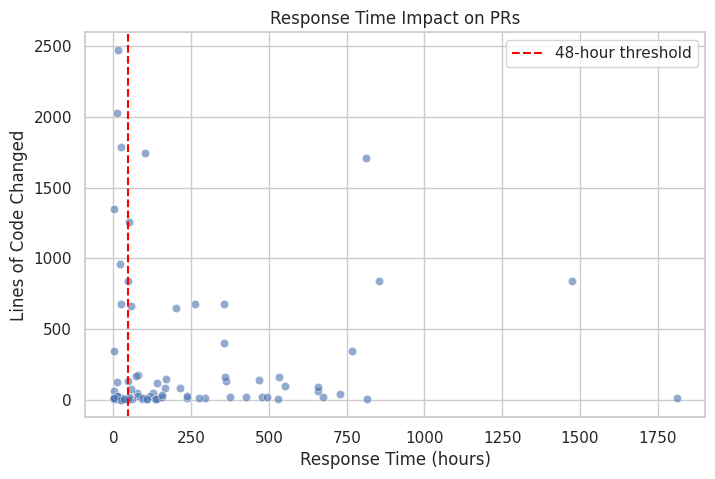

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["response_time"], y=df["loc"], alpha=0.6)

# Highlight threshold
plt.axvline(48, color="red", linestyle="--", label="48-hour threshold")

plt.title("Response Time Impact on PRs")
plt.xlabel("Response Time (hours)")
plt.ylabel("Lines of Code Changed")
plt.legend()
plt.show()